<a href="https://colab.research.google.com/github/3TInfoTinker/DeepLearningHandsOn/blob/main/HealthcareDLproject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**🧐 Find out the following:**   *DL Handson Homework Assignment-2*
- What is the most prominent and relevant factor causing the stroke?
- Visualize Age and BMI frequency.
- Find a correlation between Age and Gender. ✔
- Find a correlation between hypertension and Avg Glucose level. ✔
- Find a correlation between Marital status and Smoking status. ✔
- Find if there is any relation between work type and heart disease. ✔
- Find the frequency of Smoking status in the form of Histogram. 
- What is Min, Max and Avg glucose level? ✔
- Find the frequency of Males and females in the data.
- Find if marital status is related to smoking status. ✔

**For those who have done ML, DL course:**
- Can you make a predictive Model using ML methods? ✔



**imbalanced-learn is a python package offering a number of re-sampling techniques commonly used in datasets showing strong between-class imbalance. It is compatible with scikit-learn and is part of scikit-learn-contrib projects.[ https://pypi.org/project/imbalanced-learn/**

In [ ]:
%cd drive/MyDrive/DLdataz/DLProject/

[Errno 2] No such file or directory: 'drive/MyDrive/DLdataz/DLProject/'
/content/drive/MyDrive/DLdataz/DLProject


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
#from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, auc, roc_auc_score,accuracy_score, confusion_matrix, precision_score, recall_score


**💔 I split one file of 5110 patient's records into Tow files:**
- File with 1500 rows for Testing model.
- File with 3610 rows for Training model.


In [ ]:
testdata = pd.read_csv('Proj2test.csv')
traindata = pd.read_csv('Proj2train.csv')

shaptr = traindata.shape
shaptst = testdata.shape

print("Training Data Shape:", shaptr, "\n\nTest Data Shape:", shaptst)

Training Data Shape: (3610, 12) 

Test Data Shape: (1500, 12)


In [ ]:
traindata.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
testdata.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67055,Female,31.00,0,0,Yes,Private,Rural,77.01,31.3,formerly smoked,0
1,51024,Female,24.00,0,0,Yes,Private,Urban,105.26,26.1,never smoked,0
2,60774,Male,1.88,0,0,No,children,Rural,68.35,19.1,Unknown,0
3,35039,Female,28.00,0,0,No,Private,Rural,99.07,17.6,never smoked,0
4,46141,Female,24.00,0,0,No,Private,Rural,147.74,21.4,Unknown,0


#**🔎 Descriptive overview of Training dataset and Correlation between columns of data.**

In [ ]:
traindata.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,3610.000000,3610.000000,3610.000000,3610.00000,3610.000000,3445.000000,3610.000000
mean,36205.288643,43.874560,0.106094,0.05928,107.005928,29.023628,0.068975
std,21211.386080,22.666496,0.308001,0.23618,45.749791,7.922705,0.253447
min,77.000000,0.080000,0.000000,0.00000,55.220000,10.300000,0.000000
25%,17315.250000,26.000000,0.000000,0.00000,77.570000,23.600000,0.000000
50%,36404.000000,46.000000,0.000000,0.00000,92.525000,28.100000,0.000000
75%,54576.000000,62.000000,0.000000,0.00000,114.835000,33.200000,0.000000
max,72918.000000,82.000000,1.000000,1.00000,271.740000,97.600000,1.000000


In [ ]:
trnmsngval = traindata.isnull().sum()
trprcnt = trnmsngval /len(traindata)*100

print("\nTraining data heads with number of records with missing data:\n\n", trnmsngval, 
      "\n\nThe percentage of missing values:\n\n",trprcnt)


Training data heads with number of records with missing data:

 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  165
smoking_status         0
stroke                 0
dtype: int64 

The percentage of missing values:

 id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  4.570637
smoking_status       0.000000
stroke               0.000000
dtype: float64


In [ ]:
tstmsngval = testdata.isnull().sum()
prcent = tstmsngval / len(traindata)*100

print("\nTesting data heads with number of records with missing data:\n\n", tstmsngval, "\n\nThe percentage of missing values:\n\n",prcent)


Testing data heads with number of records with missing data:

 id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  36
smoking_status        0
stroke                0
dtype: int64 

The percentage of missing values:

 id                   0.00000
gender               0.00000
age                  0.00000
hypertension         0.00000
heart_disease        0.00000
ever_married         0.00000
work_type            0.00000
Residence_type       0.00000
avg_glucose_level    0.00000
bmi                  0.99723
smoking_status       0.00000
stroke               0.00000
dtype: float64


**Missing Value Count:**\
The percentage of misssing values in:

- Training dataset is 4.54% with 165 records.
- Testing dataset is 0.997% with 36 records.


In [134]:
traindata.fillna(traindata.mean())
testdata.fillna(testdata.mean())
traindata.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3610 entries, 0 to 3609
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3610 non-null   int64  
 1   gender             3610 non-null   object 
 2   age                3610 non-null   float64
 3   hypertension       3610 non-null   int64  
 4   heart_disease      3610 non-null   int64  
 5   ever_married       3610 non-null   object 
 6   work_type          3610 non-null   object 
 7   Residence_type     3610 non-null   object 
 8   avg_glucose_level  3610 non-null   float64
 9   bmi                3445 non-null   float64
 10  smoking_status     3610 non-null   object 
 11  stroke             3610 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 338.6+ KB


In [135]:
traindf = traindata.dropna(axis = 0, how = "any")
testdf = testdata.dropna(axis = 0, how = "any")

print('TrainData shape: {}'.format(traindf.shape), 'TestData shape: {}'.format(testdf.shape))

TrainData shape: (3445, 12) TestData shape: (1464, 12)


In [ ]:
# Looking for unique values in the datasets

traindf["stroke"].unique()

array([1, 0])

In [ ]:
traindf["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
traindf["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# Looking for the patients with Stroke +ve.

traindf["stroke"].value_counts()

0    3236
1     209
Name: stroke, dtype: int64

#**General overview of correlation between categories**

In [ ]:
traindf.corr()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,-0.014553,-0.018506,-0.002499,-0.014005,-0.021130,0.009576
age,-0.014553,1.000000,0.275621,0.267536,0.245671,0.310761,0.273127
hypertension,-0.018506,0.275621,1.000000,0.111796,0.181567,0.170635,0.158707
heart_disease,-0.002499,0.267536,0.111796,1.000000,0.173856,0.046181,0.153076
avg_glucose_level,-0.014005,0.245671,0.181567,0.173856,1.000000,0.173161,0.160402
bmi,-0.021130,0.310761,0.170635,0.046181,0.173161,1.000000,0.046444
stroke,0.009576,0.273127,0.158707,0.153076,0.160402,0.046444,1.000000


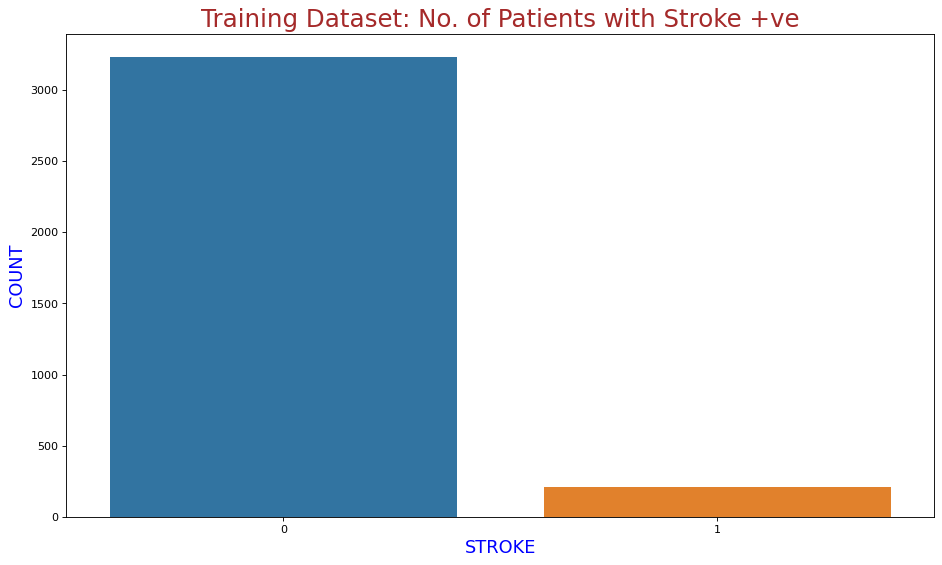

In [140]:
plt.figure(figsize = (14,8), dpi = 80)

sns.countplot(x = traindf["stroke"])

plt.xlabel("STROKE", fontsize = 16, color = "Blue")
plt.ylabel("COUNT", fontsize = 16, color = "Blue") 

plt.title("Training Dataset: No. of Patients with Stroke +ve", fontsize = 22, color = 'Brown', fontweight = 16)
plt.show()

In [ ]:
# Gender count

traindf["gender"].value_counts()


Female    2007
Male      1437
Other        1
Name: gender, dtype: int64

In [ ]:
# Gender based grouping the Stroke record.

traindf.groupby(["gender"])["stroke"].value_counts()

gender  stroke
Female  0         1887
        1          120
Male    0         1348
        1           89
Other   0            1
Name: stroke, dtype: int64

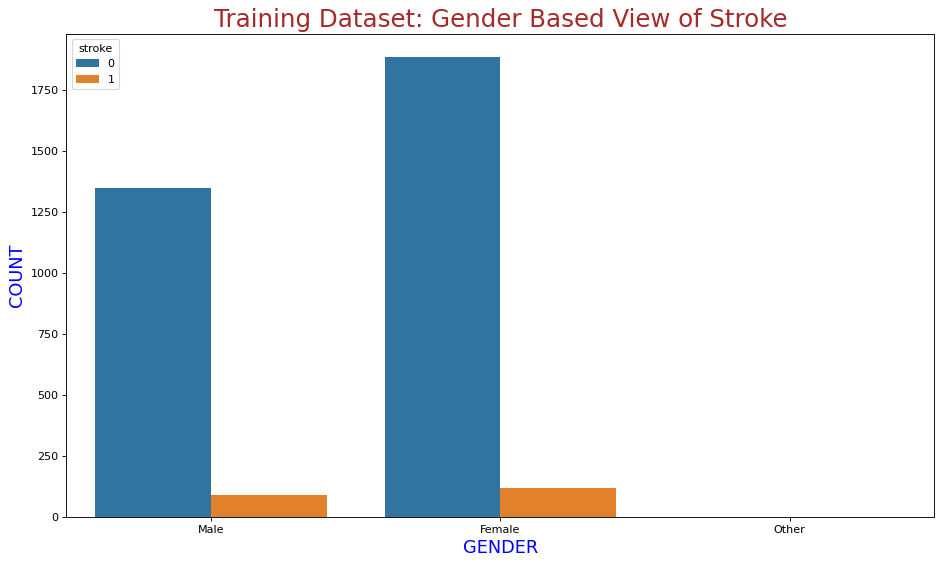

In [141]:
plt.figure(figsize = (14,8), dpi = 80)

sns.countplot(x = traindf["gender"], hue = traindf["stroke"])

plt.xlabel("GENDER", fontsize = 16, color = "Blue")
plt.ylabel("COUNT", fontsize = 16, color = "Blue")

plt.title("Training Dataset: Gender Based View of Stroke", fontsize = 22, color = 'Brown', fontweight = 16)
plt.show()

In [ ]:
# Looking for the Stroke data by "smoking_status" category.

traindf.groupby(["smoking_status"])["stroke"].value_counts()

smoking_status   stroke
Unknown          0         1008
                 1           29
formerly smoked  0          528
                 1           57
never smoked     0         1202
                 1           84
smokes           0          498
                 1           39
Name: stroke, dtype: int64

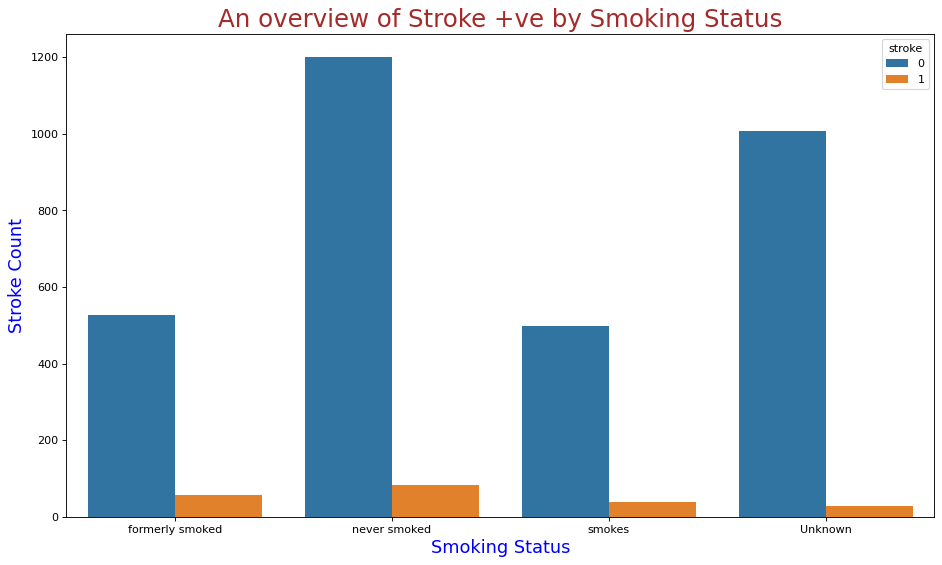

In [144]:
plt.figure(figsize = (14,8), dpi = 80)

sns.countplot(x = traindf["smoking_status"], hue = traindf["stroke"])

plt.xlabel("Smoking Status", fontsize = 16, color = "Blue")
plt.ylabel("Stroke Count", fontsize = 16, color = "Blue") 

plt.title("An overview of Stroke +ve by Smoking Status", fontsize = 22, color = 'Brown', fontweight = 16)
plt.show()

##**Filtering Object and Integer data values**

In [ ]:
strvalutraindf = traindf.select_dtypes(include = ['object'])

In [ ]:
strvalutestdf = testdf.select_dtypes(include = ['object'])

In [ ]:
intvalutraindf = traindf.select_dtypes(include = ['integer', "float"])
intvalutestdf = testdf.select_dtypes(include = ['integer', "float"])

#**Converting Object into integer for ML algo.**

In [145]:

labels = LabelEncoder()

objtoint = strvalutraindf.apply(labels.fit_transform)
objtoint = objtoint.join(intvalutraindf)
objtoint.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,1,2,1,1,9046,67.0,0,1,228.69,36.6,1
2,1,1,2,0,2,31112,80.0,0,1,105.92,32.5,1
3,0,1,2,1,3,60182,49.0,0,0,171.23,34.4,1
4,0,1,3,0,2,1665,79.0,1,0,174.12,24.0,1
5,1,1,2,1,1,56669,81.0,0,0,186.21,29.0,1


In [ ]:
check = strvalutestdf.apply(labels.fit_transform)
test = check.join(intvalutestdf)
test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0,1,2,0,1,67055,31.00,0,0,77.01,31.3,0
1,0,1,2,1,2,51024,24.00,0,0,105.26,26.1,0
2,1,0,4,0,0,60774,1.88,0,0,68.35,19.1,0
3,0,0,2,0,2,35039,28.00,0,0,99.07,17.6,0
4,0,0,2,0,0,46141,24.00,0,0,147.74,21.4,0


In [ ]:
# Working on Features and Labels "trnx" and "trny".

trnx = objtoint.drop(["stroke", "id"], axis = 1)
trnx.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,1,2,1,1,67.0,0,1,228.69,36.6
2,1,1,2,0,2,80.0,0,1,105.92,32.5
3,0,1,2,1,3,49.0,0,0,171.23,34.4
4,0,1,3,0,2,79.0,1,0,174.12,24.0
5,1,1,2,1,1,81.0,0,0,186.21,29.0


In [ ]:
trny = objtoint["stroke"]
trny.head()



0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

#**Finding the Correlation in some selective categories**

● Find a correlation between Age and Gender ✅\
● Find a correlation between hypertension and Avg Glucose level ✅\
● Find a correlation between Marital status and Smoking status ✅\
● Find if there is any relation between Work Type and Heart Disease. ✅


In [92]:
coragstrok = objtoint.loc[:,['age', 'stroke']].corr()

corhprgluco = objtoint.loc[:,['hypertension', 'avg_glucose_level']].corr()

corwrkhrtd = objtoint.loc[:,['work_type', 'heart_disease']].corr()

cormrtlsmok = objtoint.loc[:,['ever_married', 'smoking_status']].corr()

print("🔹Correlation between Age and Stroke data:\n\n",coragstrok,
      "\n\n🔹Correlation between Hypertension and Average Glucose Level:\n\n", corhprgluco,
      "\n\n🔹Correlation between WorkType and HeartDisease:\n\n", corwrkhrtd,
      "\n\n🔹Correlation between Ever Married and Smoking Status:\n\n", cormrtlsmok)

🔹Correlation between Age and Stroke data:

              age    stroke
age     1.000000  0.273127
stroke  0.273127  1.000000 

🔹Correlation between Hypertension and Average Glucose Level:

                    hypertension  avg_glucose_level
hypertension           1.000000           0.181567
avg_glucose_level      0.181567           1.000000 

🔹Correlation between WorkType and HeartDisease:

                work_type  heart_disease
work_type       1.000000      -0.027563
heart_disease  -0.027563       1.000000 

🔹Correlation between Ever Married and Smoking Status:

                 ever_married  smoking_status
ever_married        1.000000        0.251263
smoking_status      0.251263        1.000000


##**Finding Min, Max and Avg for the Avg_Clugose_Level column**

##**Avg_Glucose_Level : min**

In [ ]:
traindf.loc[traindf['avg_glucose_level'].idxmin()]

id                          37404
gender                       Male
age                            42
hypertension                    0
heart_disease                   0
ever_married                  Yes
work_type                 Private
Residence_type              Urban
avg_glucose_level           55.22
bmi                            27
smoking_status       never smoked
stroke                          0
Name: 1191, dtype: object

##**Avg_Glucose_Level : max**

In [ ]:
traindf.loc[traindf['avg_glucose_level'].idxmax()]


id                     69112
gender                  Male
age                       68
hypertension               1
heart_disease              1
ever_married             Yes
work_type            Private
Residence_type         Rural
avg_glucose_level     271.74
bmi                     31.1
smoking_status        smokes
stroke                     1
Name: 193, dtype: object

##**Avg_Glucose_Level : Avg**

In [ ]:

Valcount = traindf['avg_glucose_level'].count()
Valsum = traindf['avg_glucose_level'].sum()
Valavg = traindf['avg_glucose_level'].sum()/Valcount

print("Average Glucose Level in Training Dataset:\n\n", 
      "Total Value Counts:\t\t", Valcount, "\n\nTotal Sum:\t\t\t", Valsum, 
      "\n\nAverage Value of Glucose Level:\t", Valavg,)

Average Glucose Level in Training Dataset:

 Total Value Counts:		 3445 

Total Sum:			 365808.39 

Average Value of Glucose Level:	 106.18530914368651


#**Spliting the data for Training and Testing.**

In [94]:

RANDOM_STATE = 42
FIG_SIZE = (10, 7)


Xtrain, Xtest, Ytrain, Ytest = train_test_split(trnx, trny, random_state=RANDOM_STATE)

In [98]:
Xtrain.head()


<bound method DataFrame.info of       gender  ever_married  work_type  ...  heart_disease  avg_glucose_level   bmi
0          1             1          2  ...              1             228.69  36.6
2          1             1          2  ...              1             105.92  32.5
3          0             1          2  ...              0             171.23  34.4
4          0             1          3  ...              0             174.12  24.0
5          1             1          2  ...              0             186.21  29.0
...      ...           ...        ...  ...            ...                ...   ...
3605       0             1          2  ...              1             217.79  26.1
3606       1             1          2  ...              0              95.62  29.5
3607       1             1          2  ...              0              93.80  23.9
3608       1             1          2  ...              1              90.61  25.8
3609       0             1          2  ...             

#**Learning NaiveBayes Model -- 🤯 --**  

In [99]:
mdl = GaussianNB()
mdl.fit(Xtrain, Ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

##**Predict**

In [100]:


predXtest = mdl.predict(Xtest)
predXtest

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

##**Accuracy Scores with NaiveBayes Model.**
##Test

In [101]:

testscore = mdl.score(Xtest, Ytest)
print("The NaiveBayes' Model TestScore: ", testscore)

The NaiveBayes' Model TestScore:  0.8306264501160093


##Train

In [102]:
trainscore = mdl.score(Xtrain, Ytrain)
print("The NaiveBayes' Model TrainScore: ", trainscore)

The NaiveBayes' Model TrainScore:  0.8559814169570267


#**Measuring Model Performance by Cross-validation** *( CV )*
**- sklearn.model_selection -- cross_validate**

In [103]:
xvalscores = cross_validate(mdl, trnx, trny, cv=9, return_estimator=True)
sorted(xvalscores.keys())
xvalscores

{'estimator': (GaussianNB(priors=None, var_smoothing=1e-09),
  GaussianNB(priors=None, var_smoothing=1e-09),
  GaussianNB(priors=None, var_smoothing=1e-09),
  GaussianNB(priors=None, var_smoothing=1e-09),
  GaussianNB(priors=None, var_smoothing=1e-09),
  GaussianNB(priors=None, var_smoothing=1e-09),
  GaussianNB(priors=None, var_smoothing=1e-09),
  GaussianNB(priors=None, var_smoothing=1e-09),
  GaussianNB(priors=None, var_smoothing=1e-09)),
 'fit_time': array([0.00956964, 0.00900507, 0.00415707, 0.0030582 , 0.00294089,
        0.00269055, 0.00270653, 0.00257254, 0.0027566 ]),
 'score_time': array([0.00193334, 0.00486088, 0.0017333 , 0.00131845, 0.00120234,
        0.0011909 , 0.00114274, 0.0011723 , 0.00118232]),
 'test_score': array([0.85117493, 0.86422977, 0.8537859 , 0.85900783, 0.85900783,
        0.85639687, 0.8616188 , 0.83246073, 0.85078534])}

##**Using NB's Confusion Matrix**

In [104]:
NBconfmtrx = pd.crosstab(Ytest, predXtest)
NBconfmtrx

col_0,0,1
stroke,,
0,685,112
1,34,31


#**Principle Component Analysis (PCA)**\
While many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized, intuitively we can think of *Principle Component Analysis (PCA)* as being a prime example of when normalization is important. 

In PCA we look for the components that maximize the variance. If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis, if those features are not scaled. As a change in height of one meter can be considered much more important than the change in weight of one kilogram, this is clearly incorrect.

**To illustrate this,** PCA is performed comparing the use of data with **StandardScaler** applied, to unscaled data. The results are visualized and a clear difference noted. 

The 1st principal component in the **unscaled** set can be seen. It can be seen that feature #13 dominates the direction, being a whole two orders of magnitude above the other features.

This is contrasted when observing the principal component for the scaled version of the data.

**In the scaled version,** the orders of magnitude are roughly the same across all the features.

In [105]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

RANDOM_STATE = 42
FIG_SIZE = (10, 7)

# Make a train/test split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(trnx, trny, random_state=RANDOM_STATE)
Xtrain.head()


,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
2951,0,0,2,1,1,23.0,0,0,105.28,27.1
3181,1,1,2,1,2,38.0,0,0,86.93,31.1
1581,0,1,2,0,2,44.0,0,0,70.58,25.1
2841,0,0,2,0,1,33.0,0,0,106.08,32.5
3084,1,0,2,0,0,30.0,0,0,61.87,23.9


##**Fit to data and predict using Pipelined GausianNB and PCA.**

#Unscaled classification

In [106]:

unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(Xtrain, Ytrain)
pred_test = unscaled_clf.predict(Xtest)
pred_test


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

##StantardScaler Applied

In [107]:

std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(Xtrain, Ytrain)
pred_test_std = std_clf.predict(Xtest)

pred_test_std

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#**Aaccuracies in scaled and unscaled data with PCA. 🙉 and It looks far better then the previous**

Increment in **PCA(n_components=2)** decreases the Accuracy Level e.g. *if it was 9 then the accuracy would be arround 81%*

In [108]:

print('\nPrediction accuracy for the (Unscaled) normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(Ytest, pred_test)))

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(Ytest, pred_test_std)))



Prediction accuracy for the (Unscaled) normal test dataset with PCA
91.07%


Prediction accuracy for the standardized test dataset with PCA
91.18%



#**Extract PCA from pipeline and show 1st principal components.**

##Extract PCA from Pipeline.

In [109]:

pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

##Show 1st Principal components.

In [111]:

print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])


PC 1 without scaling:
 [ 6.67798496e-04  2.13760406e-03 -1.71329063e-03 -1.08046005e-04
  2.01929396e-03  1.56082020e-01  1.25269444e-03  1.04840553e-03
  9.87120740e-01  3.48760556e-02]

PC 1 with scaling:
 [-0.01444165  0.47686818 -0.3624722   0.02421952  0.31413132  0.51007396
  0.24471331  0.20103741  0.23006256  0.35823474]


#**PCA used without and with-scale on Xtrain data for visualization.**

In [113]:

Xtrain_transformed = pca.transform(Xtrain)
scaler = std_clf.named_steps['standardscaler']
Xtrain_std_transformed = pca_std.transform(scaler.transform(Xtrain))

#**Visualization:**
##Standardized vs. Untouched dataset with PCA performed

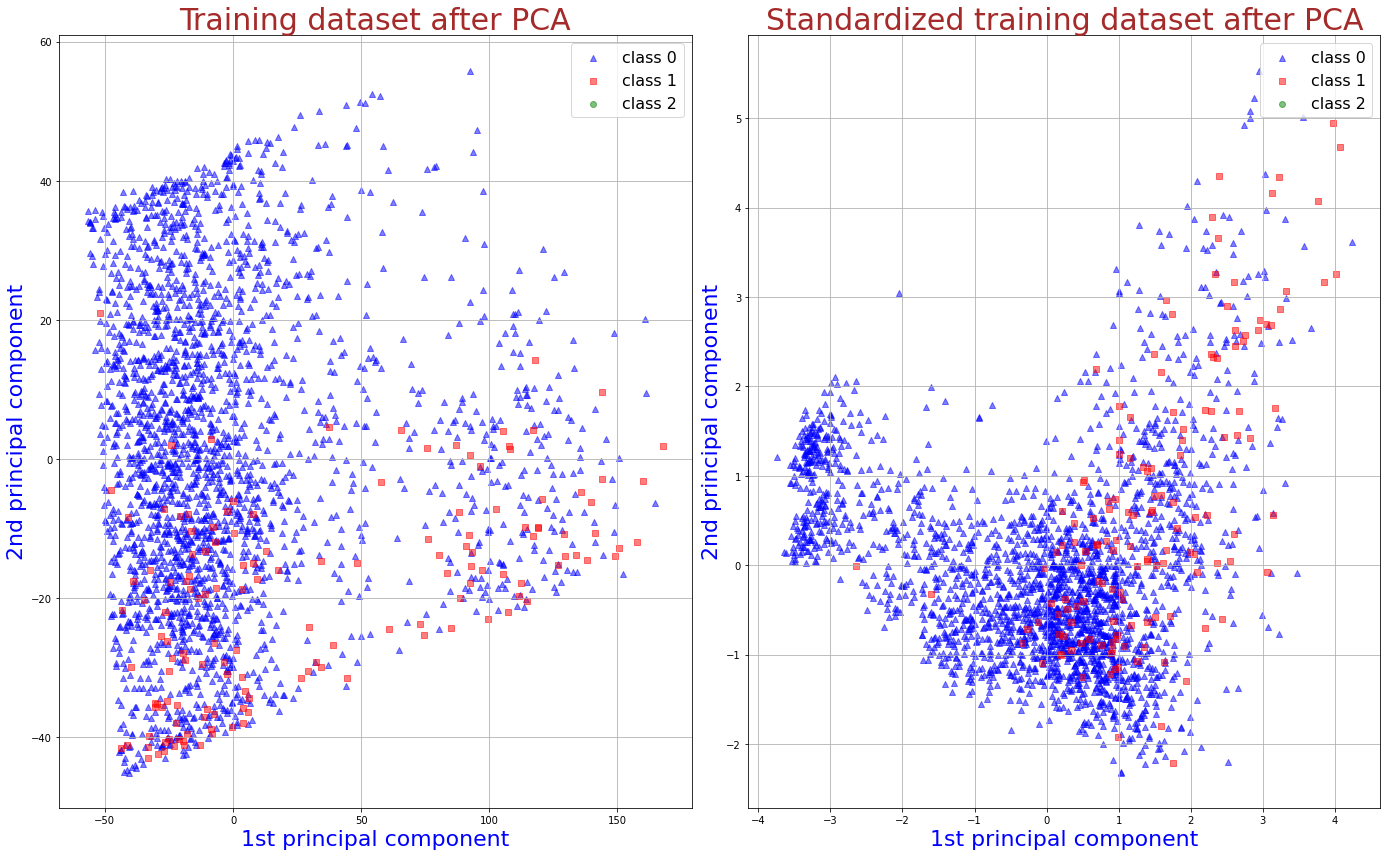

In [126]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 12))

for l, c, m in zip(range(0, 3), ('Blue', 'Red', 'Green'), ('^', 's', 'o')):
    ax1.scatter(Xtrain_transformed[Ytrain == l, 0],
                Xtrain_transformed[Ytrain == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(Xtrain_std_transformed[Ytrain == l, 0],
                Xtrain_std_transformed[Ytrain == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA', fontsize = 30, color = 'Brown', fontweight = 14)
ax2.set_title('Standardized training dataset after PCA', fontsize = 30, color = 'Brown', fontweight = 16)

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component', fontsize = 22, color = 'Blue')
    ax.set_ylabel('2nd principal component', fontsize = 22, color = 'Blue')
    ax.legend(loc='upper right', fontsize = 16,)
    ax.grid()

plt.tight_layout()

plt.show()

#**Cross-validation:**
##Unscaled/normal Test data set with PCA.

In [132]:
xvalscores = cross_validate(unscaled_clf, trnx, trny, cv=9, return_estimator=True)
sorted(xvalscores.keys())
xvalscores

{'estimator': (Pipeline(memory=None,
           steps=[('pca',
                   PCA(copy=True, iterated_power='auto', n_components=2,
                       random_state=None, svd_solver='auto', tol=0.0,
                       whiten=False)),
                  ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))],
           verbose=False), Pipeline(memory=None,
           steps=[('pca',
                   PCA(copy=True, iterated_power='auto', n_components=2,
                       random_state=None, svd_solver='auto', tol=0.0,
                       whiten=False)),
                  ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))],
           verbose=False), Pipeline(memory=None,
           steps=[('pca',
                   PCA(copy=True, iterated_power='auto', n_components=2,
                       random_state=None, svd_solver='auto', tol=0.0,
                       whiten=False)),
                  ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))]

##StandardScaler Test data set with PCA.

In [133]:
xvalscores = cross_validate(std_clf, trnx, trny, cv=9, return_estimator=True)
sorted(xvalscores.keys())
xvalscores

{'estimator': (Pipeline(memory=None,
           steps=[('standardscaler',
                   StandardScaler(copy=True, with_mean=True, with_std=True)),
                  ('pca',
                   PCA(copy=True, iterated_power='auto', n_components=2,
                       random_state=None, svd_solver='auto', tol=0.0,
                       whiten=False)),
                  ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))],
           verbose=False), Pipeline(memory=None,
           steps=[('standardscaler',
                   StandardScaler(copy=True, with_mean=True, with_std=True)),
                  ('pca',
                   PCA(copy=True, iterated_power='auto', n_components=2,
                       random_state=None, svd_solver='auto', tol=0.0,
                       whiten=False)),
                  ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))],
           verbose=False), Pipeline(memory=None,
           steps=[('standardscaler',
                   S